<a href="https://colab.research.google.com/github/iqbalmohomed/LLM4BUS/blob/main/LLM4BUS_assn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai

In [ ]:
from openai import OpenAI
from google.colab import userdata

open_ai_key = userdata.get('open_ai_key')
client = OpenAI(api_key=open_ai_key)

In [ ]:
# https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection?resource=download
import json

def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

data = list(parse_data('Sarcasm_Headlines_Dataset.json'))

In [ ]:
data[0]

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
 'is_sarcastic': 0}

In [ ]:
import pandas as pd
filename = 'Sarcasm_Headlines_Dataset.json'
df = pd.read_json(filename,lines=True)

array([[<Axes: title={'center': 'is_sarcastic'}>]], dtype=object)

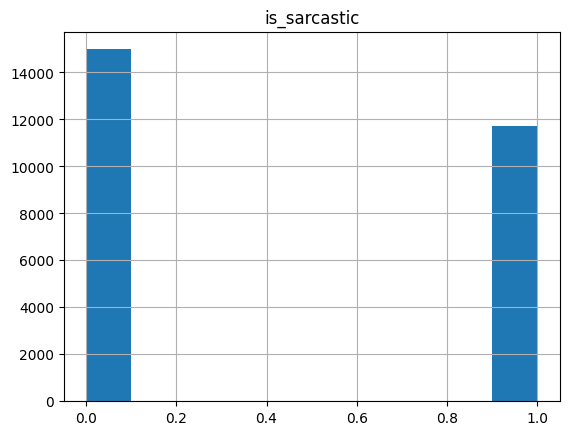

In [ ]:
df.hist(column='is_sarcastic')

In [ ]:
df_serious = df[df.is_sarcastic == 0]
df_sarcastic = df[df.is_sarcastic == 1]

In [ ]:
df_sarcastic

,article_link,headline,is_sarcastic
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
15,https://entertainment.theonion.com/nuclear-bom...,nuclear bomb detonates during rehearsal for 's...,1
16,https://www.theonion.com/cosby-lawyer-asks-why...,cosby lawyer asks why accusers didn't come for...,1
...,...,...,...
26693,https://www.theonion.com/new-bailiff-tired-of-...,new bailiff tired of hearing how old bailiff d...,1
26694,https://www.theonion.com/breaking-the-onion-in...,breaking: 'the onion' in kill range of boston ...,1
26695,https://www.theonion.com/seaworld-crowd-applau...,seaworld crowd applauds for dolphin playfully ...,1
26702,https://politics.theonion.com/pentagon-to-with...,pentagon to withhold budget figures out of res...,1


In [ ]:
df_serious

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [ ]:
df_serious.headline[0]

"former versace store clerk sues over secret 'black code' for minority shoppers"

In [ ]:
def chat(message):
    """
    Send a message to the OpenAI GPT-4 model and return its response.

    This function interacts with the OpenAI API, specifically using the GPT-3.5-turbo model. It takes a user's message as input, sends it to the model, and returns the model's text-only response. The function ensures the AI's output is concise by providing a system-level instruction.

    Parameters:
    message (str): A string containing the user's message to the AI.

    Returns:
    json: The json  response generated by the GPT model.
    """
    #print(message)
    e1 = df_serious.iloc[0].headline
    e2 = df_serious.iloc[1].headline
    e3 = df_sarcastic.iloc[0].headline
    e4 = df_sarcastic.iloc[1].headline

    response = client.chat.completions.create(
        #model="gpt-4-turbo-preview",

        #model="gpt-4",
        model="gpt-3.5-turbo",
        #response_format={ "type": "json_object" },
        logprobs=True,
        messages=[
            {"role": "system", "content": f"""
            You are a helpful classification assistant. You only return valid JSON with the fields classification that has the values Serious or Funny, and the field confidence that has the values Low, Medium or High.

            Below are examples of news headlines and their classifications. After studying these examples, please classify whether the headline at the end is Serious or Funny.

              Example 1:

              Text: "{e1}"
              Classification: Serious

              Example 2:

              Text: "{e2}"
              Classification: Serious

              Example 3:

              Text: "{e3}"
              Classification: Funny

              Example 4:

              Text: "{e4}"
              Classification: Funny

              """},
            {"role": "user", "content": f"Classify the following headline as Serious or Funny and return with probability as JSON: {message}"}
        ]
    )
    text_only = response.choices[0].message.content
    return json.loads(text_only)

In [ ]:
results_serious = []
for i in range(2,22):
  res = chat(df_serious.iloc[i].headline)
  results_serious.append(res)
  print(res)
  time.sleep(1)

{'classification': 'Funny', 'confidence': 'Medium'}
{'classification': 'Serious', 'confidence': 'High'}
{'classification': 'Serious', 'confidence': 'Medium'}
{'classification': 'Serious', 'confidence': 'Medium'}
{'classification': 'Serious', 'confidence': 'Medium'}
{'classification': 'Serious', 'confidence': 'High'}
{'classification': 'Serious', 'confidence': 'Medium'}
{'classification': 'Serious', 'confidence': 'Medium'}
{'classification': 'Serious', 'confidence': 'Medium'}
{'classification': 'Serious', 'confidence': 'High'}
{'classification': 'Serious', 'confidence': 'High'}
{'classification': 'Serious', 'confidence': 'High'}
{'classification': 'Serious', 'confidence': 'High'}
{'classification': 'Funny', 'confidence': 'Medium'}
{'classification': 'Serious', 'confidence': 'Medium'}
{'classification': 'Serious', 'confidence': 'Medium'}
{'classification': 'Serious', 'confidence': 'High'}
{'classification': 'Serious', 'confidence': 'High'}
{'classification': 'Serious', 'confidence': 'Med

In [ ]:
import time

<Axes: >

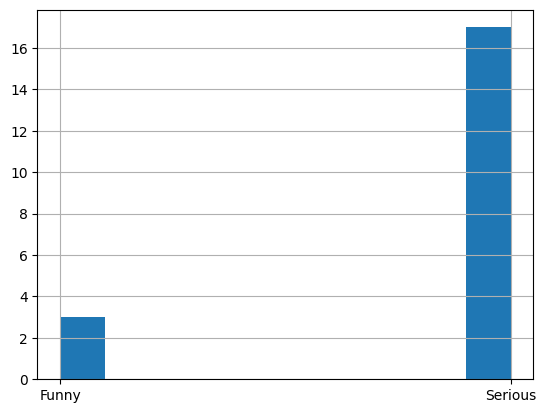

In [ ]:
results_serious_df = pd.DataFrame.from_records(results_serious)
results_serious_df['classification'].hist()

In [ ]:
results_funny = []
for i in range(2,22):
  res = chat(df_sarcastic.iloc[i].headline)
  results_funny.append(res)
  print(res)
  time.sleep(1)

{'classification': 'Funny', 'confidence': 'Medium'}
{'classification': 'Serious', 'confidence': 'Low'}
{'classification': 'Funny', 'confidence': 'High'}
{'classification': 'Funny', 'confidence': 'Medium'}
{'classification': 'Funny', 'confidence': 'Medium'}
{'classification': 'Funny', 'confidence': 'Medium'}
{'classification': 'Serious', 'confidence': 'Medium'}
{'classification': 'Serious', 'confidence': 'High'}
{'classification': 'Funny', 'confidence': 'Medium'}
{'classification': 'Funny', 'confidence': 'Medium'}
{'classification': 'Funny', 'confidence': 'High'}
{'classification': 'Serious', 'confidence': 'High'}
{'classification': 'Serious', 'confidence': 'Medium'}
{'classification': 'Serious', 'confidence': 'High'}
{'classification': 'Funny', 'confidence': 'High'}
{'classification': 'Serious', 'confidence': 'Medium'}
{'classification': 'Funny', 'confidence': 'Medium'}
{'classification': 'Funny', 'confidence': 'Medium'}
{'classification': 'Funny', 'confidence': 'Medium'}
{'classificat

<Axes: >

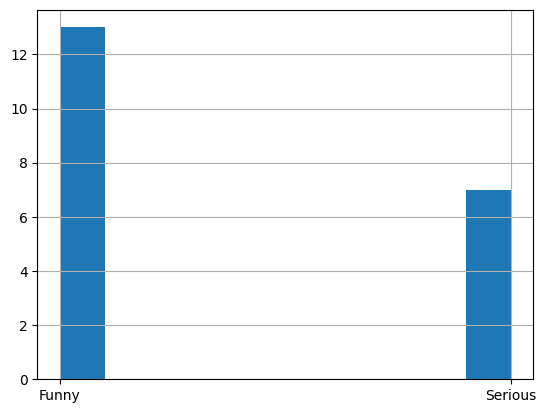

In [ ]:
results_funny_df = pd.DataFrame.from_records(results_funny)
results_funny_df['classification'].hist()

In [ ]:
errors_funny = [3,8,9,13,14,15,17]

In [ ]:
for k in errors_funny:
  print(df_sarcastic.iloc[k].headline)

nuclear bomb detonates during rehearsal for 'spider-man' musical
ex-con back behind bar
after careful consideration, bush recommends oil drilling
christian bale visits sikh temple victims
'right to live life in complete, stunned horror,' added to constitution
nasa now almost positive mars is rocky
longtime teacher retires without changing a single student's life


In [ ]:
errors_serious = [2, 15, 21]
for k in errors_serious:
  print(df_serious.iloc[k].headline)

j.k. rowling wishes snape happy birthday in the most magical way
this is why you shouldn't go to the circus
gillian jacobs on what it's like to kiss adam brody


Error rate for Funny headlines: 7/20 = 35%

Error rate for Serious headlines: 3/20 = 15%
